# Air traffic forecasting 🛬

## Imports

In [2]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sys
!{sys.executable} -m pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime
import plotly
import plotly.express as px
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import prophet
from prophet import Prophet
from datetime import datetime


<ipython-input-7-138184e6146f>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [8]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [9]:
#%cd /content/gdrive/MyDrive/ Magistère/MAG 3/Air traffic forecasting

In [10]:
pip install pipreqs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pipreqs /content --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/requirements.txt


In [12]:
#from google.colab import files
#files.download('/content/requirements.txt')

## EDA $-$ Data viz

In [13]:
parquet_file = 'https://github.com/leonie-lorcher/prevision-trafic-aerien/raw/main/data/traffic_10lines.parquet'
traffic_df = pd.read_parquet(parquet_file, engine='auto')
traffic_df

,date,pax,seats,flight_type,flight_typename,home_airport,paired_airport,home_airportname,paired_airportname,distance,...,airline_iata,airline_name,scheduled_datetime,direction,home_country,paired_country,home_countryname,paired_countryname,travel_area,aircraft_type
3223247,2018-08-04,155.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2018-08-04 12:15:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223311,2017-05-03,132.0,144.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,BA,British Airways,2017-05-03 11:20:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223347,2022-08-05,136.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2022-08-05 21:55:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223366,2019-10-16,170.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,EC,EasyJet,2019-10-16 09:10:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
3223425,2019-01-26,166.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2019-01-26 06:55:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977453,2022-04-19,72.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2022-04-19 07:25:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977758,2020-03-22,162.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2020-03-22 16:45:00,D,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977808,2021-12-23,164.0,313.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2021-12-23 10:04:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9995284,2019-04-06,161.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2019-04-06 08:35:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,Boeing 787-900


In [42]:
traffic_df[['home_airport', 'paired_airport']].value_counts().reset_index(name='count')

,home_airport,paired_airport,count
0,LIS,OPO,72331
1,LIS,ORY,52923
2,LGW,BCN,50406
3,LGW,AMS,37464
4,SSA,GRU,36057
5,POP,JFK,3460
6,SCL,LHR,1077
7,NTE,FUE,684
8,LYS,PIS,382
9,PNH,NGB,115


In [14]:
traffic_df = pd.read_parquet('/content/gdrive/MyDrive/ Magistère/MAG 3/Air traffic forecasting/traffic_10lines.parquet')

In [15]:
traffic_df

,date,pax,seats,flight_type,flight_typename,home_airport,paired_airport,home_airportname,paired_airportname,distance,...,airline_iata,airline_name,scheduled_datetime,direction,home_country,paired_country,home_countryname,paired_countryname,travel_area,aircraft_type
3223247,2018-08-04,155.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2018-08-04 12:15:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223311,2017-05-03,132.0,144.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,BA,British Airways,2017-05-03 11:20:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223347,2022-08-05,136.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2022-08-05 21:55:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223366,2019-10-16,170.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,EC,EasyJet,2019-10-16 09:10:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
3223425,2019-01-26,166.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2019-01-26 06:55:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977453,2022-04-19,72.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2022-04-19 07:25:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977758,2020-03-22,162.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2020-03-22 16:45:00,D,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977808,2021-12-23,164.0,313.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2021-12-23 10:04:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9995284,2019-04-06,161.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2019-04-06 08:35:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,Boeing 787-900


loadfactor = % de remplissage de l’avion

pax = number of passengers

In [16]:
traffic_df.describe(include='all',datetime_is_numeric=True).transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,254899,NaN,NaN,NaN,2019-04-14 00:20:15.163653120,2016-01-01 00:00:00,2017-07-31 00:00:00,2019-02-07 00:00:00,2020-10-15 00:00:00,2023-03-10 00:00:00,NaN
pax,254899.0,NaN,NaN,NaN,127.082676,-11.0,88.0,140.0,168.0,582.0,53.050019
seats,250749.0,NaN,NaN,NaN,159.352879,0.0,144.0,174.0,186.0,615.0,47.311964
flight_type,251168,19,J,240627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight_typename,254899,4,Scheduled,251250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_airport,254899,8,LIS,125254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paired_airport,254899,10,OPO,72331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_airportname,254899,8,Lisbon,125254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paired_airportname,254899,10,Porto,72331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,254899.0,<NA>,<NA>,<NA>,944.365078,277.0,277.0,1109.0,1437.0,11653.0,886.540144


In [17]:
profile_report = ProfileReport(traffic_df)
profile_report.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# Parenthesis trick
# Dans la route aérienne LIS-OPO par exemple, on compte les vols allers (LIS->OPO) mais aussi les vols retour
# (OPO->LIS). Pour savoir dans quel sens a volé l'avion, il faut regarder la valeur prise par la variable direction.

(traffic_df
 .groupby(['home_airport', 'paired_airport'])
 .agg(date_min=('date','min'), date_max=('date','max'), pax=('pax','sum'))
 .reset_index()
)

,home_airport,paired_airport,date_min,date_max,pax
0,LGW,AMS,2016-01-01,2023-03-09,5372822.0
1,LGW,BCN,2016-01-01,2023-03-10,7613076.0
2,LIS,OPO,2016-01-01,2023-03-09,5632745.0
3,LIS,ORY,2016-01-01,2023-03-09,7696068.0
4,LYS,PIS,2017-11-20,2023-03-09,10351.0
5,NTE,FUE,2019-01-06,2023-03-05,99854.0
6,PNH,NGB,2016-05-05,2023-03-07,10018.0
7,POP,JFK,2018-01-01,2023-03-09,492434.0
8,SCL,LHR,2019-01-01,2023-03-07,193693.0
9,SSA,GRU,2019-01-01,2023-03-09,5272186.0


In [19]:
# Viz sur la ligne Nantes - Fuertaventura
# Notation fonctionnelle : f∘g∘h. Ordre "inversé" par rapport à une requête SQL : from, where, select.

(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 ['airline_name']
 .value_counts()
)

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

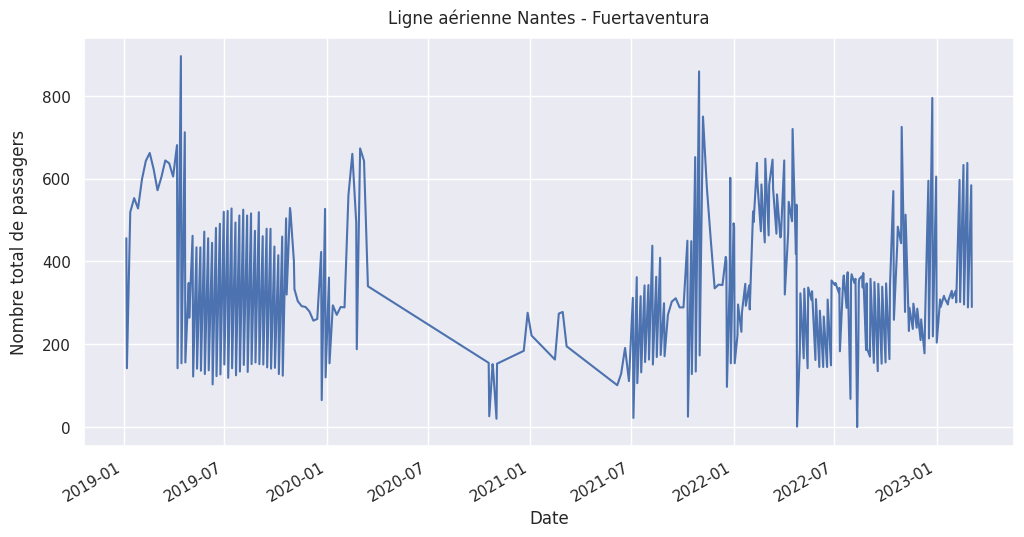

In [20]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')['pax_total']
 .plot(figsize=(12,6))
 )
plt.title('Ligne aérienne Nantes - Fuertaventura', fontsize=12, pad=10)
plt.ylabel('Nombre total de passagers', labelpad=10)
plt.xlabel('Date')
plt.show()

In [21]:
# Affichage des données de la ligne Nantes - Fuertaventura sur un graph Plotly.

# Création de la fonction

def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.

  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)

  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated

  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig

In [22]:
# Affichage du graph. En gris la période COVID (Mars 2020 - Janvier 2022)

draw_ts_multiple(
    (traffic_df
     .query('home_airport == "NTE" and paired_airport == "FUE"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)

## Sélection d'une ligne aérienne

In [23]:
# Création d'une fonction qui génère un dataframe contenant le nombre de passagers, par date, sur une ligne aérienne donnée.

def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
  """Extract route dataframe from traffic dataframe for route from home airport to paired airport

  Args:
  - traffic_df (pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df = (traffic_df
         .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport, paired=pairedAirport))
         .groupby(['home_airport', 'paired_airport', 'date'])
         .agg(pax_total=('pax', 'sum'))
         .reset_index()
         )
  return _df

In [24]:
# On génère un dataframe pour la ligne Nantes - Fuertaventura

nte_fue_df = generate_route_df(traffic_df, "NTE", "FUE")
nte_fue_df

,home_airport,paired_airport,date,pax_total
0,NTE,FUE,2019-01-06,456.0
1,NTE,FUE,2019-01-07,142.0
2,NTE,FUE,2019-01-13,519.0
3,NTE,FUE,2019-01-20,553.0
4,NTE,FUE,2019-01-27,528.0
...,...,...,...,...
288,NTE,FUE,2023-02-19,296.0
289,NTE,FUE,2023-02-25,638.0
290,NTE,FUE,2023-02-26,289.0
291,NTE,FUE,2023-03-04,584.0


In [25]:
nte_fue_df = nte_fue_df.rename(columns={'date': 'ds', 'pax_total': 'y'})
nte_fue_df

,home_airport,paired_airport,ds,y
0,NTE,FUE,2019-01-06,456.0
1,NTE,FUE,2019-01-07,142.0
2,NTE,FUE,2019-01-13,519.0
3,NTE,FUE,2019-01-20,553.0
4,NTE,FUE,2019-01-27,528.0
...,...,...,...,...
288,NTE,FUE,2023-02-19,296.0
289,NTE,FUE,2023-02-25,638.0
290,NTE,FUE,2023-02-26,289.0
291,NTE,FUE,2023-03-04,584.0


In [27]:
fig = px.line(nte_fue_df, x = 'ds', y = 'y', title = 'Trafic sur la ligne aérienne Nantes - Fuertaventura')
fig.update_traces(line_color = 'cornflowerblue')
fig.update_layout(xaxis_title = 'Date', yaxis_title = 'Nombre total de passagers')
fig.show()

## Forecast Prophet model

In [28]:
baseline_model = Prophet()
baseline_model.fit(nte_fue_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzakmjagb/t493rtle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzakmjagb/bn1p2usm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36554', 'data', 'file=/tmp/tmpzakmjagb/t493rtle.json', 'init=/tmp/tmpzakmjagb/bn1p2usm.json', 'output', 'file=/tmp/tmpzakmjagb/prophet_model5a34i4vm/prophet_model-20230601133145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:31:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:31:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
# Génère un dataframe de dates, avec 15 jours en plus
future_df = baseline_model.make_future_dataframe(periods=15)

future_df.tail(16)

,ds
292,2023-03-05
293,2023-03-06
294,2023-03-07
295,2023-03-08
296,2023-03-09
297,2023-03-10
298,2023-03-11
299,2023-03-12
300,2023-03-13
301,2023-03-14


In [30]:
# Produire une prédiction du nombre total de passagers (pax total) sur les 15 prochains jours
forecast_df = baseline_model.predict(future_df)

forecast_df[['ds', 'yhat']].tail(15)

,ds,yhat
293,2023-03-06,247.542045
294,2023-03-07,408.756102
295,2023-03-08,410.043710
296,2023-03-09,110.918348
297,2023-03-10,412.572476
298,2023-03-11,472.949417
299,2023-03-12,507.579067
300,2023-03-13,255.846424
301,2023-03-14,416.658230
302,2023-03-15,417.387071


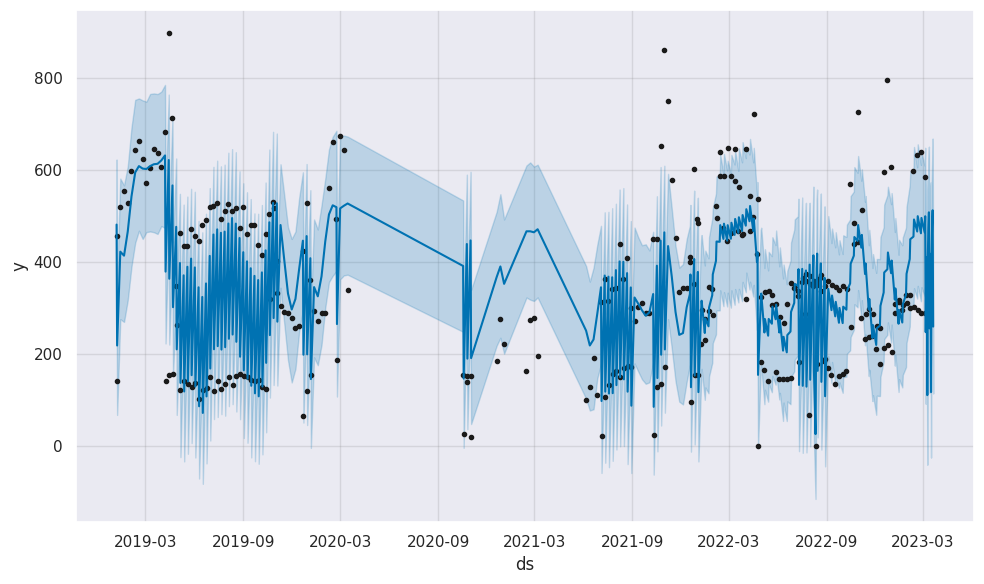

In [31]:
graph = baseline_model.plot(forecast_df)

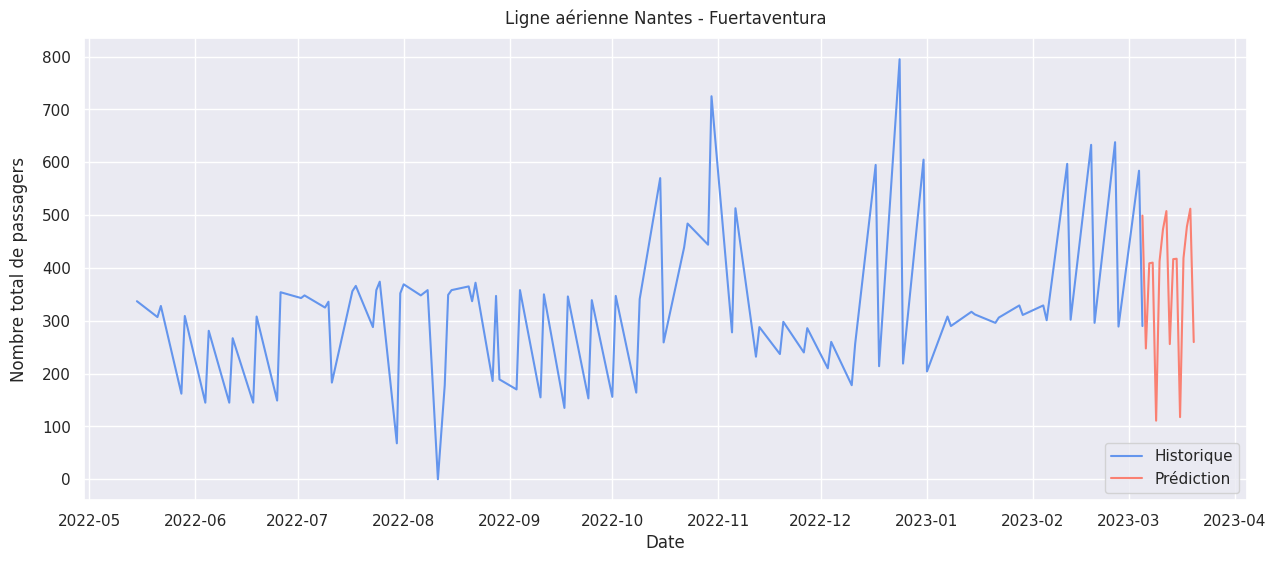

In [32]:
# Graph Matplotlib (à partir de 2022 pour que ce soit plus lisible)

ax = plt.subplots(figsize=(15,6))
plt.plot(nte_fue_df['ds'].iloc[200:], nte_fue_df['y'].iloc[200:], color = 'cornflowerblue')
plt.plot(forecast_df['ds'].iloc[292:], forecast_df['yhat'].iloc[292:], color = 'salmon')
plt.legend(['Historique', 'Prédiction'], loc ="lower right")
plt.title('Ligne aérienne Nantes - Fuertaventura', fontsize=12, pad=10)
plt.ylabel('Nombre total de passagers', labelpad=10)
plt.xlabel('Date')
plt.show()

In [33]:
# Dans le dataframe de prédiction, garder uniquement les données prédites
forecast_ddf = forecast_df[['ds', 'yhat']].tail(15)

# Graph Plotly
fig = px.line(nte_fue_df, x = 'ds', y = 'y', title = 'Historique et prédiction du trafic sur une ligne aérienne')
fig.update_traces(line_color = 'cornflowerblue', name = 'Historique', showlegend = True)

fig.add_scatter(x = forecast_ddf['ds'], y = forecast_ddf['yhat'], mode = 'lines', name = 'Prédiction', line = dict(color='salmon'))

fig.update_layout(xaxis_title = 'Date', yaxis_title = 'Nombre total de passagers')

fig.show()

## Généralisation du modèle Prophet

In [47]:
aer_dep = 'POP'
aer_arriv = 'JFK'

# On génère un dataframe pour la ligne choisie
ligne_aer_df = generate_route_df(traffic_df, aer_dep, aer_arriv)
ligne_aer_df = ligne_aer_df.rename(columns={'date': 'ds', 'pax_total': 'y'})

In [48]:
# Entraînement du modèle sur le dataframe
baseline_model = Prophet()
baseline_model.fit(ligne_aer_df)

# Génère un dataframe de dates, avec 15 jours en plus
future_df = baseline_model.make_future_dataframe(periods=15)

# Produire une prédiction du nombre total de passagers (pax total) sur les 15 prochains jours
forecast_df = baseline_model.predict(future_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzakmjagb/v9nnv6v3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzakmjagb/6wvbchtf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91970', 'data', 'file=/tmp/tmpzakmjagb/v9nnv6v3.json', 'init=/tmp/tmpzakmjagb/6wvbchtf.json', 'output', 'file=/tmp/tmpzakmjagb/prophet_modeleilqray0/prophet_model-20230601144433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
# Dans le dataframe de prédiction, garder uniquement les données prédites
forecast_ddf = forecast_df[['ds', 'yhat']].tail(15)

# Graph Plotly
fig = px.line(ligne_aer_df, x = 'ds', y = 'y', title = 'Historique et prédiction du trafic sur une ligne aérienne')
fig.update_traces(line_color = 'cornflowerblue', name = 'Historique', showlegend = True)

fig.add_scatter(x = forecast_ddf['ds'], y = forecast_ddf['yhat'], mode = 'lines', name = 'Prédiction', line = dict(color='salmon'))

fig.update_layout(xaxis_title = 'Date', yaxis_title = 'Nombre total de passagers')

fig.show()